#### Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()
import matplotlib.pyplot as plt

%matplotlib inline

#### Load data

In [19]:
retail = pd.read_csv('../output/OnlineRetailClean.csv', parse_dates = ['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.299999
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340000


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo        397884 non-null int64
StockCode        397884 non-null object
Description      397884 non-null object
Quantity         397884 non-null int64
InvoiceDate      397884 non-null datetime64[ns]
UnitPrice        397884 non-null float64
CustomerID       397884 non-null int64
Country          397884 non-null object
CheckoutPrice    397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


#### Revenue
- Total revenue
- Revenue by country
- Revenue by month
- Revenue by day of week
- Revenue by time

#### Total revenue

In [4]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.88637655

#### Revenue by country

In [5]:
rev_by_country = retail.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending = False)
rev_by_country

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090241e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

In [6]:
rev_by_country_pct = rev_by_country / total_revenue * 100
rev_by_country_pct

Country
United Kingdom          82.011638
Netherlands              3.203156
EIRE                     2.979842
Germany                  2.568249
France                   2.345578
Australia                1.554427
Spain                    0.690992
Switzerland              0.633390
Belgium                  0.462288
Sweden                   0.430665
Japan                    0.419870
Norway                   0.405833
Portugal                 0.375248
Finland                  0.253002
Singapore                0.238787
Channel Islands          0.229486
Denmark                  0.212709
Italy                    0.196189
Cyprus                   0.152505
Austria                  0.114445
Poland                   0.082306
Israel                   0.081039
Greece                   0.053421
Iceland                  0.048365
Canada                   0.041143
USA                      0.040178
Malta                    0.030585
Unspecified              0.029929
United Arab Emirates     0.021347
Lebano

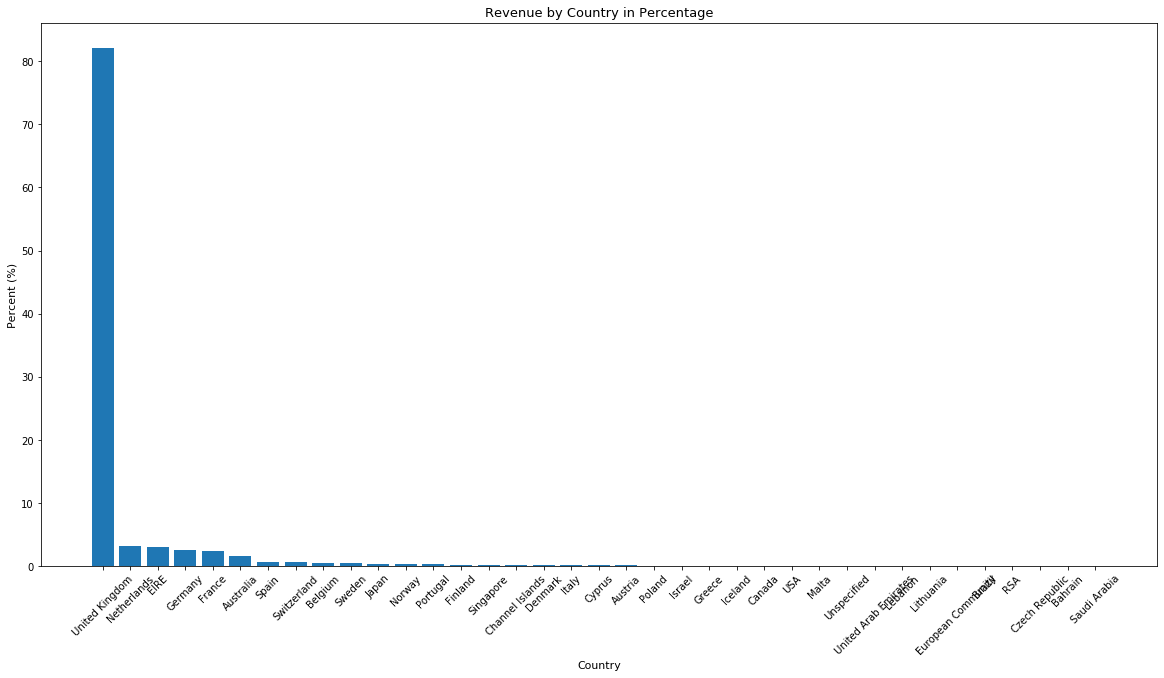

In [107]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.bar(df.index.astype(str), df, color=color)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13)
    ax.set_xticklabels(df.index,rotation=rotation)
    
plot_bar(rev_by_country_pct, 'Country', 'Percent (%)', 'Revenue by Country in Percentage')

#### Revenue by month

In [108]:
retail['InvoiceDate'].sort_values()

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
24       2010-12-01 08:34:00
22       2010-12-01 08:34:00
21       2010-12-01 08:34:00
20       2010-12-01 08:34:00
19       2010-12-01 08:34:00
18       2010-12-01 08:34:00
17       2010-12-01 08:34:00
23       2010-12-01 08:34:00
15       2010-12-01 08:34:00
14       2010-12-01 08:34:00
13       2010-12-01 08:34:00
12       2010-12-01 08:34:00
11       2010-12-01 08:34:00
10       2010-12-01 08:34:00
9        2010-12-01 08:34:00
16       2010-12-01 08:34:00
25       2010-12-01 08:35:00
38       2010-12-01 08:45:00
39       2010-12-01 08:45:00
40       2010-12-01 08:45:00
44       2010-12-01 08:45:00
                 ...        
397862   2011-12-09 12:31:00
397852   2011-12-09 12:31:00
397853   2011-12-09 12:31:00
397845   2011-

In [109]:
def extract_month(date):
    return '{}{:02d}'.format(date.year, date.month) # yyyymm

In [110]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012    5.727139e+05
201101    5.694450e+05
201102    4.471373e+05
201103    5.955008e+05
201104    4.692004e+05
201105    6.785946e+05
201106    6.612137e+05
201107    6.000910e+05
201108    6.453439e+05
201109    9.528384e+05
201110    1.039319e+06
201111    1.161817e+06
201112    5.181928e+05
Name: CheckoutPrice, dtype: float64

In [111]:
rev_by_month_pct = rev_by_month / total_revenue * 100
rev_by_month_pct

201012     6.426750
201101     6.390068
201102     5.017584
201103     6.682454
201104     5.265165
201105     7.614897
201106     7.419857
201107     6.733964
201108     7.241773
201109    10.692344
201110    11.662790
201111    13.037417
201112     5.814937
Name: CheckoutPrice, dtype: float64

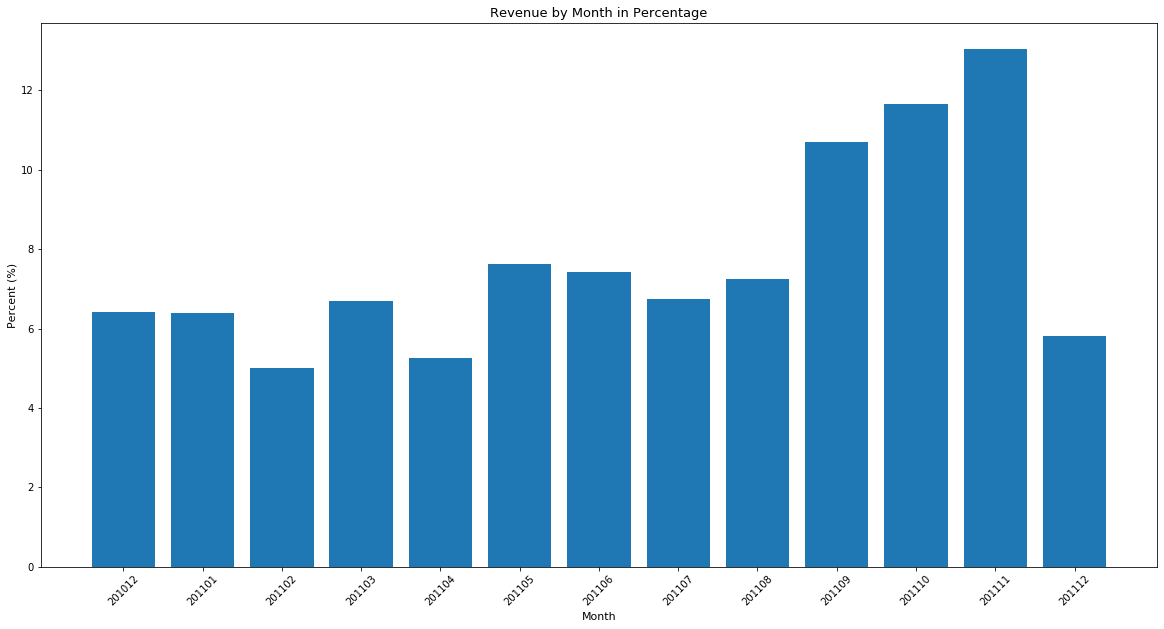

In [112]:
plot_bar(rev_by_month_pct, 'Month', 'Percent (%)', 'Revenue by Month in Percentage')

#### Revenue by day of week

In [113]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda x: x.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1.367146e+06
1    1.700635e+06
2    1.588336e+06
3    1.976859e+06
4    1.485917e+06
6    7.925142e+05
Name: CheckoutPrice, dtype: float64

In [114]:
dow = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = dow[rev_by_dow.index]

In [115]:
rev_by_dow_pct = rev_by_dow / total_revenue * 100
rev_by_dow_pct

Mon    15.341531
Tue    19.083793
Wed    17.823628
Thu    22.183465
Fri    16.674328
Sun     8.893255
Name: CheckoutPrice, dtype: float64

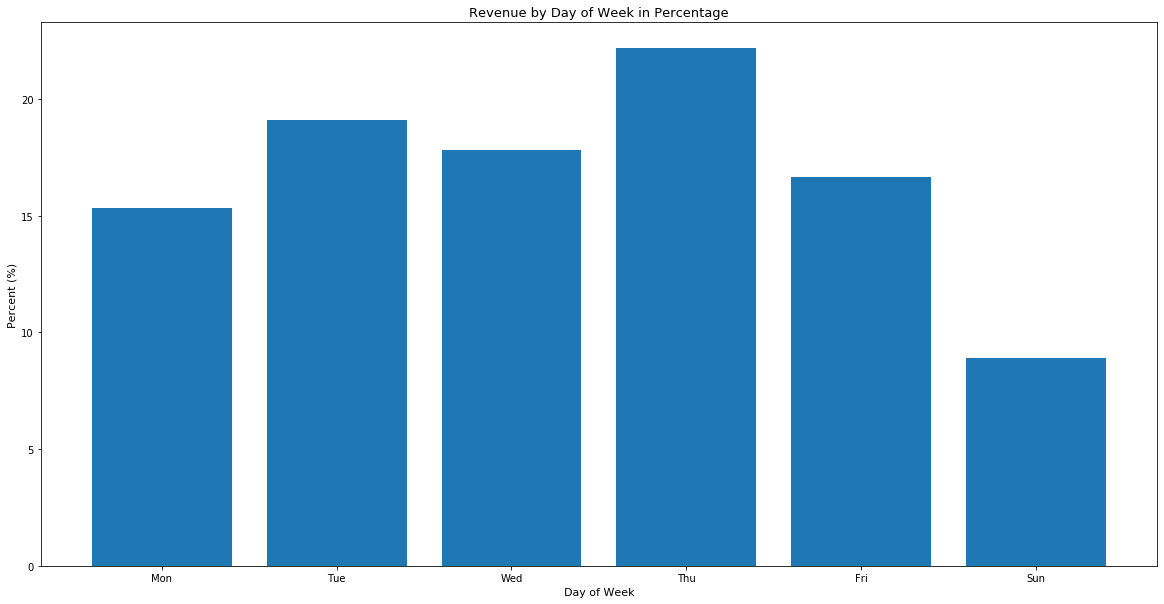

In [116]:
plot_bar(rev_by_dow_pct, 'Day of Week', 'Percent (%)', 'Revenue by Day of Week in Percentage', rotation=0)

#### Revenue by time

In [117]:
rev_by_time = retail.set_index('InvoiceDate').groupby(lambda x: x.hour).sum()['CheckoutPrice']
rev_by_time

6     4.250000e+00
7     3.105921e+04
8     2.821156e+05
9     8.426052e+05
10    1.261193e+06
11    1.104559e+06
12    1.378571e+06
13    1.173265e+06
14    9.956294e+05
15    9.661917e+05
16    4.688858e+05
17    2.344135e+05
18    1.049544e+05
19    4.902846e+04
20    1.893276e+04
Name: CheckoutPrice, dtype: float64

In [118]:
rev_by_time_pct = rev_by_time / total_revenue * 100
rev_by_time_pct

6      0.000048
7      0.348533
8      3.165781
9      9.455354
10    14.152562
11    12.394885
12    15.469738
13    13.165874
14    11.172526
15    10.842190
16     5.261635
17     2.630488
18     1.177754
19     0.550176
20     0.212455
Name: CheckoutPrice, dtype: float64

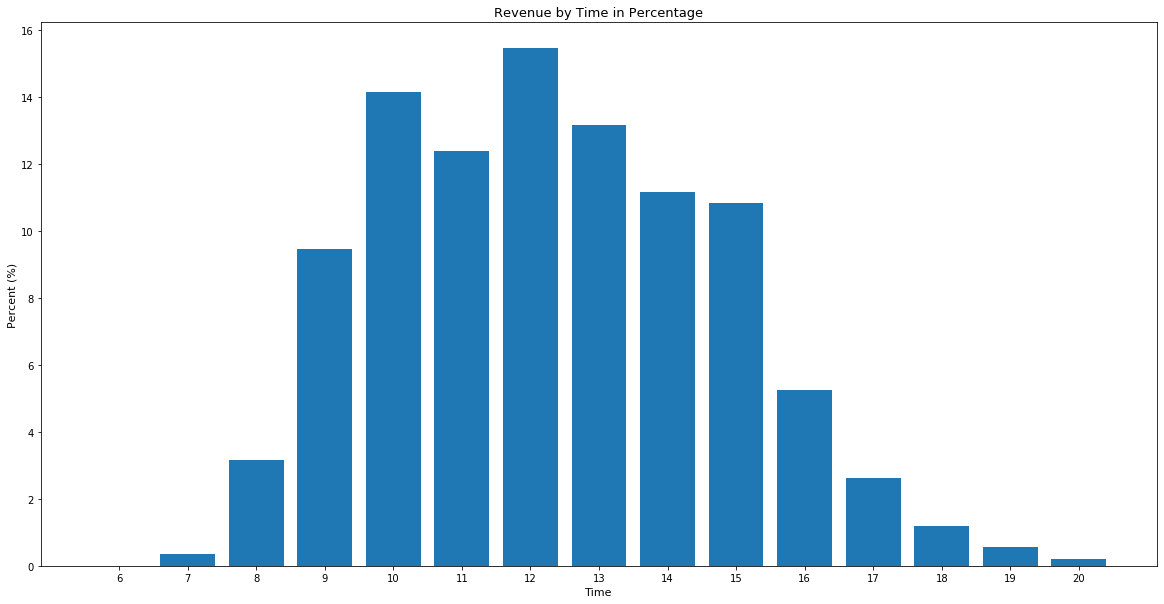

In [119]:
plot_bar(rev_by_time_pct, 'Time', 'Percent (%)', 'Revenue by Time in Percentage', rotation=0)

#### Insights from the data
- 82% of the revenue is from the UK
- November 2011 was the month with highest revenue (note not all dates for December 2011 were included in the data).
- Revenue by day of week increases untill Thursday and then decreases. There are no orders on Saturdays.
- Revenue by time increases from 7 AM to 12 PM, then decreases. After 3 PM (15:00), revenue decreases more dratically.

#### Top selling and top revenue
- Top 10 selling items
- Top 10 revenue items

In [120]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
print('Top selling items')
top_selling

Top selling items


StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [121]:
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
print('Top revenue items')
top_revenue

Top revenue items


StockCode
23843     168469.600000
22423     142592.949740
85123A    100603.499944
85099B     85220.779884
23166      81416.719990
POST       77803.960000
47566      68844.329717
84879      56580.340540
M          53779.929994
23084      51346.199251
Name: CheckoutPrice, dtype: float64

#### Revenue from top selling items by month

In [122]:
monthly_top = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling[:3].index]
monthly_top

Quantity  CheckoutPrice
StockCode                                
23166     201101     74215   77183.590000
          201105       792     869.039990
          201106       391     458.510000
          201107       718     826.940000
          201108       405     486.090000
          201109       342     397.260000
          201110       235     283.670000
          201111       631     708.110000
          201112       187     203.510000
23843     201112     80995  168469.600000
84077     201012      5139    1150.470000
          201101      1488     385.440000
          201102      3457     795.170000
          201103      3888     943.200000
          201104     10224    2281.439950
          201105      4944    1249.440000
          201106      1920     533.760000
          201107      3600     982.559995
          201108      2256     654.240000
          201109      3462     985.699999
          201110      8174    1953.979940
          201111      4500    1294.200000
          201112      1363     376.650000

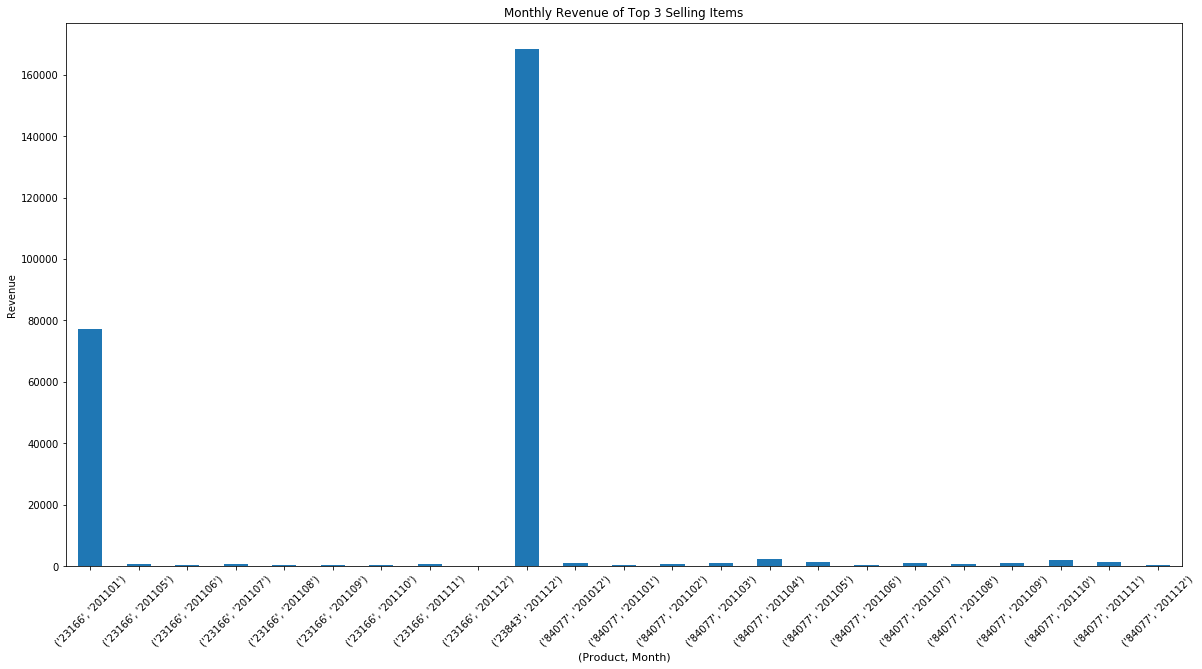

In [130]:
plot = monthly_top['CheckoutPrice'].plot(kind='bar', figsize=(20,10))
plot.set_xlabel('(Product, Month)', fontsize=11)
plot.set_ylabel('Revenue')
plot.set_title('Monthly Revenue of Top 3 Selling Items')
plot.set_xticklabels(monthly_top.index, rotation=45);

Item 23166 in January 2011 and Item 23843 in December 2011 had significantly large revenue.